In [ ]:
# Charger les données depuis le fichier CSV
 data <- read.csv2("fichier_ANOVA.csv", header=TRUE,sep=';')

In [ ]:
summary(data)


    produit         plomb       
 Min.   :1.00   Min.   :0.3200  
 1st Qu.:1.75   1st Qu.:0.8575  
 Median :2.50   Median :1.1500  
 Mean   :2.50   Mean   :1.1336  
 3rd Qu.:3.25   3rd Qu.:1.3275  
 Max.   :4.00   Max.   :1.9000  

In [ ]:
str(data)


'data.frame':	28 obs. of  2 variables:
 $ produit: int  1 1 1 1 1 1 1 2 2 2 ...
 $ plomb  : num  0.32 0.41 0.79 0.86 0.52 0.67 0.58 1.81 1.9 1.67 ...


In [ ]:
data$produit <- as.factor(data$produit)
str(data)

'data.frame':	28 obs. of  2 variables:
 $ produit: Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 2 2 2 ...
 $ plomb  : num  0.32 0.41 0.79 0.86 0.52 0.67 0.58 1.81 1.9 1.67 ...


In [ ]:
tapply(data$plomb, data$produit, mean)


1         2         3         4 
0.5928571 1.6800000 1.1371429 1.1242857

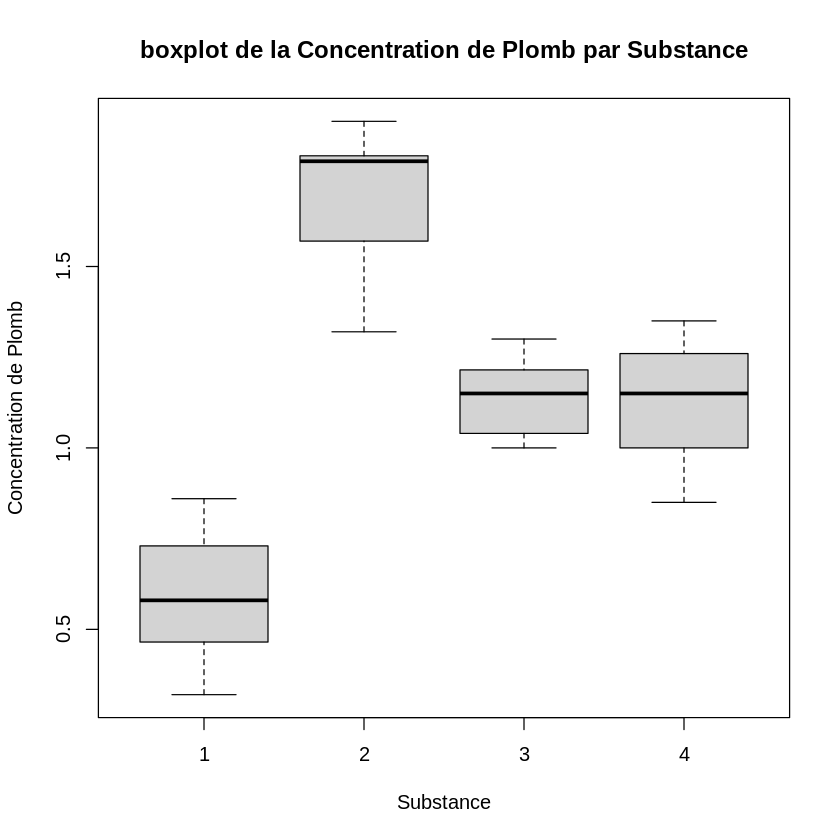

In [ ]:
boxplot(data$plomb ~ data$produit, main="boxplot de la Concentration de Plomb par Substance", xlab="Substance", ylab="Concentration de Plomb")

In [ ]:
shapiro.test(data$plomb)


	Shapiro-Wilk normality test

data:  data$plomb
W = 0.97121, p-value = 0.6135


In [ ]:
bartlett.test(data$plomb, data$produit)


	Bartlett test of homogeneity of variances

data:  data$plomb and data$produit
Bartlett's K-squared = 2.0649, df = 3, p-value = 0.559


In [ ]:
#methode1
my_lm <- lm(plomb~produit, data=data)
summary(my_lm)



Call:
lm(formula = plomb ~ produit, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36000 -0.13714  0.01929  0.12250  0.26714 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.59286    0.06805   8.712 6.76e-09 ***
produit2     1.08714    0.09624  11.296 4.32e-11 ***
produit3     0.54429    0.09624   5.655 8.00e-06 ***
produit4     0.53143    0.09624   5.522 1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1801 on 24 degrees of freedom
Multiple R-squared:  0.8417,	Adjusted R-squared:  0.8219 
F-statistic: 42.54 on 3 and 24 DF,  p-value: 9.211e-10


In [ ]:
anova(my_lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
produit,3,4.1373857,1.37912857,42.54069,9.211471e-10
Residuals,24,0.7780571,0.03241905,NA,NA


In [ ]:
method_2= aov(plomb~produit, data=data)
summary(method_2)


            Df Sum Sq Mean Sq F value   Pr(>F)    
produit      3  4.137  1.3791   42.54 9.21e-10 ***
Residuals   24  0.778  0.0324                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

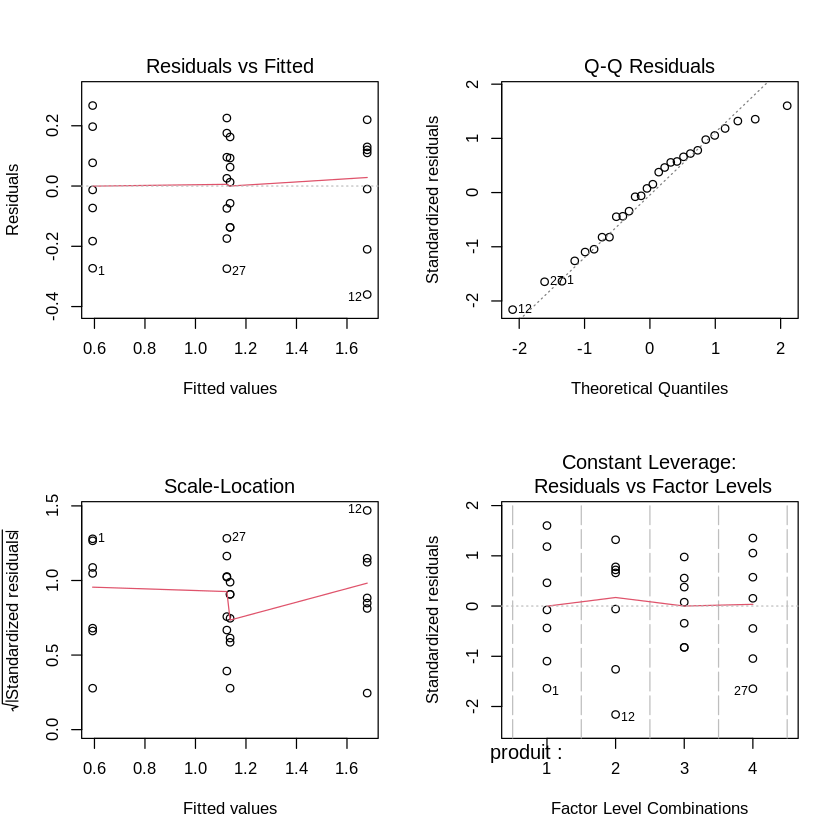

In [ ]:

par(mfrow=c(2,2))
plot(my_lm)

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’




In [ ]:
library("car")

Loading required package: carData



In [ ]:
shapiro.test(my_lm$residuals)


	Shapiro-Wilk normality test

data:  my_lm$residuals
W = 0.96397, p-value = 0.4311


In [ ]:
durbinWatsonTest(my_lm$residuals)

[1] 1.658283

In [ ]:
leveneTest(my_lm$residuals, )

ERROR: ignored

In [ ]:
summary(my_lm)


Call:
lm(formula = plomb ~ produit, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36000 -0.13714  0.01929  0.12250  0.26714 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.59286    0.06805   8.712 6.76e-09 ***
produit2     1.08714    0.09624  11.296 4.32e-11 ***
produit3     0.54429    0.09624   5.655 8.00e-06 ***
produit4     0.53143    0.09624   5.522 1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1801 on 24 degrees of freedom
Multiple R-squared:  0.8417,	Adjusted R-squared:  0.8219 
F-statistic: 42.54 on 3 and 24 DF,  p-value: 9.211e-10


In [ ]:
pairwise.t.test(data$plomb, data$produit, p.adjust.method = 'bonferroni')


	Pairwise comparisons using t tests with pooled SD 

data:  data$plomb and data$produit 

  1       2       3
2 2.6e-10 -       -
3 4.8e-05 5.0e-05 -
4 6.7e-05 3.6e-05 1

P value adjustment method: bonferroni 

In [ ]:

shapiro.test(my_lm$residuals)
	Shapiro-Wilk normality test

data:  my_lm$residuals
W = 0.96397, p-value = 0.4311


durbinWatsonTest(my_lm$residuals)
1.6582827975491
summary(my_lm)
Call:
lm(formula = plomb ~ produit, data = data)

Residuals:
     Min       1Q   Median       3Q      Max
-0.36000 -0.13714  0.01929  0.12250  0.26714

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.59286    0.06805   8.712 6.76e-09 ***
produit2     1.08714    0.09624  11.296 4.32e-11 ***
produit3     0.54429    0.09624   5.655 8.00e-06 ***
produit4     0.53143    0.09624   5.522 1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1801 on 24 degrees of freedom
Multiple R-squared:  0.8417,	Adjusted R-squared:  0.8219
F-statistic: 42.54 on 3 and 24 DF,  p-value: 9.211e-10




  pairwise.t.test(data$plomb, data$produit, p.adjust.method = 'bonferroni')
  Pairwise comparisons using t tests with pooled SD

data:  data$plomb and data$produit

  1       2       3
2 2.6e-10 -       -
3 4.8e-05 5.0e-05 -
4 6.7e-05 3.6e-05 1

P value adjustment method: bonferroni

ERROR: ignored